# Problem Solving
  Using Titanic classification prediction Passenger Survived or not.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Domain Analysis

In [4]:
# Passengerid - id of the passenger 
# Survived - this column gives idea about person survived or not 0 - not survived 1- survived 
# Pclass - passenger class 1,2,3
# Name  - name of the passenger
# Age- age of the passenger
# sex - sex of the passenger male and female
# Sibsp - number of sibiling and spouse 
# Parch - number of parents and children
# Ticket - serial number of the ticket  of the passenger
# Fare - price of the ticket in pounds
# Cabin - passengers cabin number
# Embarked - from which port the passenger is boarded S





# PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked is input variable
# Survived is output/target variable

# Basic Checks

In [5]:
# Head
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Tail
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Shape
data.shape

(891, 12)

In [8]:
# Describe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# dtypes
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# size of data
data.size

10692

In [12]:
# columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# insights
# passenger having age 80 is also travlled in the ship
# maximum fare a passenger having is  512
# passanger is a maximum 80 age in the board
# pclass is the maximum 3 
# sibsp is maximum is 8

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

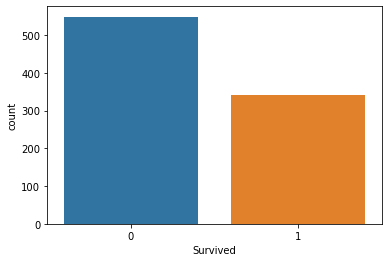

In [15]:
# Object Attributes
sns.countplot(data["Survived"])
plt.show()

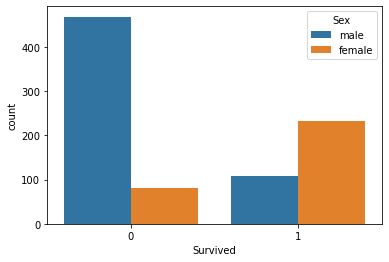

In [16]:
sns.countplot(data=data,x="Survived",hue="Sex")
plt.show()

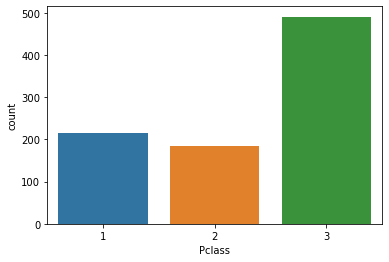

In [17]:
sns.countplot(data["Pclass"])
plt.show()

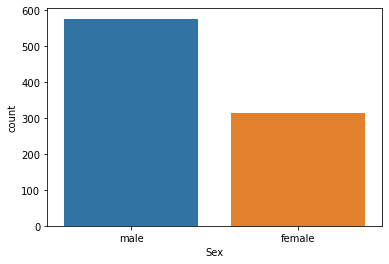

In [18]:
sns.countplot(data["Sex"])
plt.show()

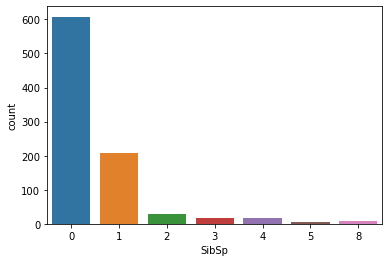

In [19]:

sns.countplot(data["SibSp"])
plt.show()

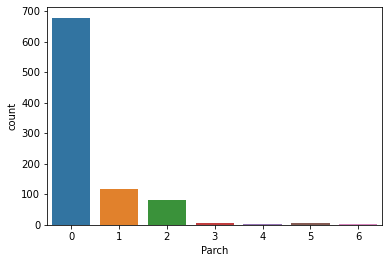

In [20]:
sns.countplot(data["Parch"])
plt.show()

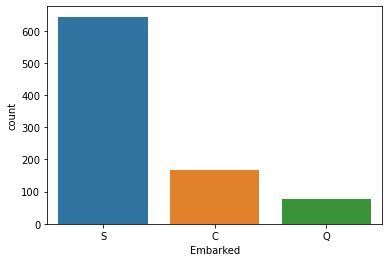

In [21]:
sns.countplot(data["Embarked"])
plt.show()

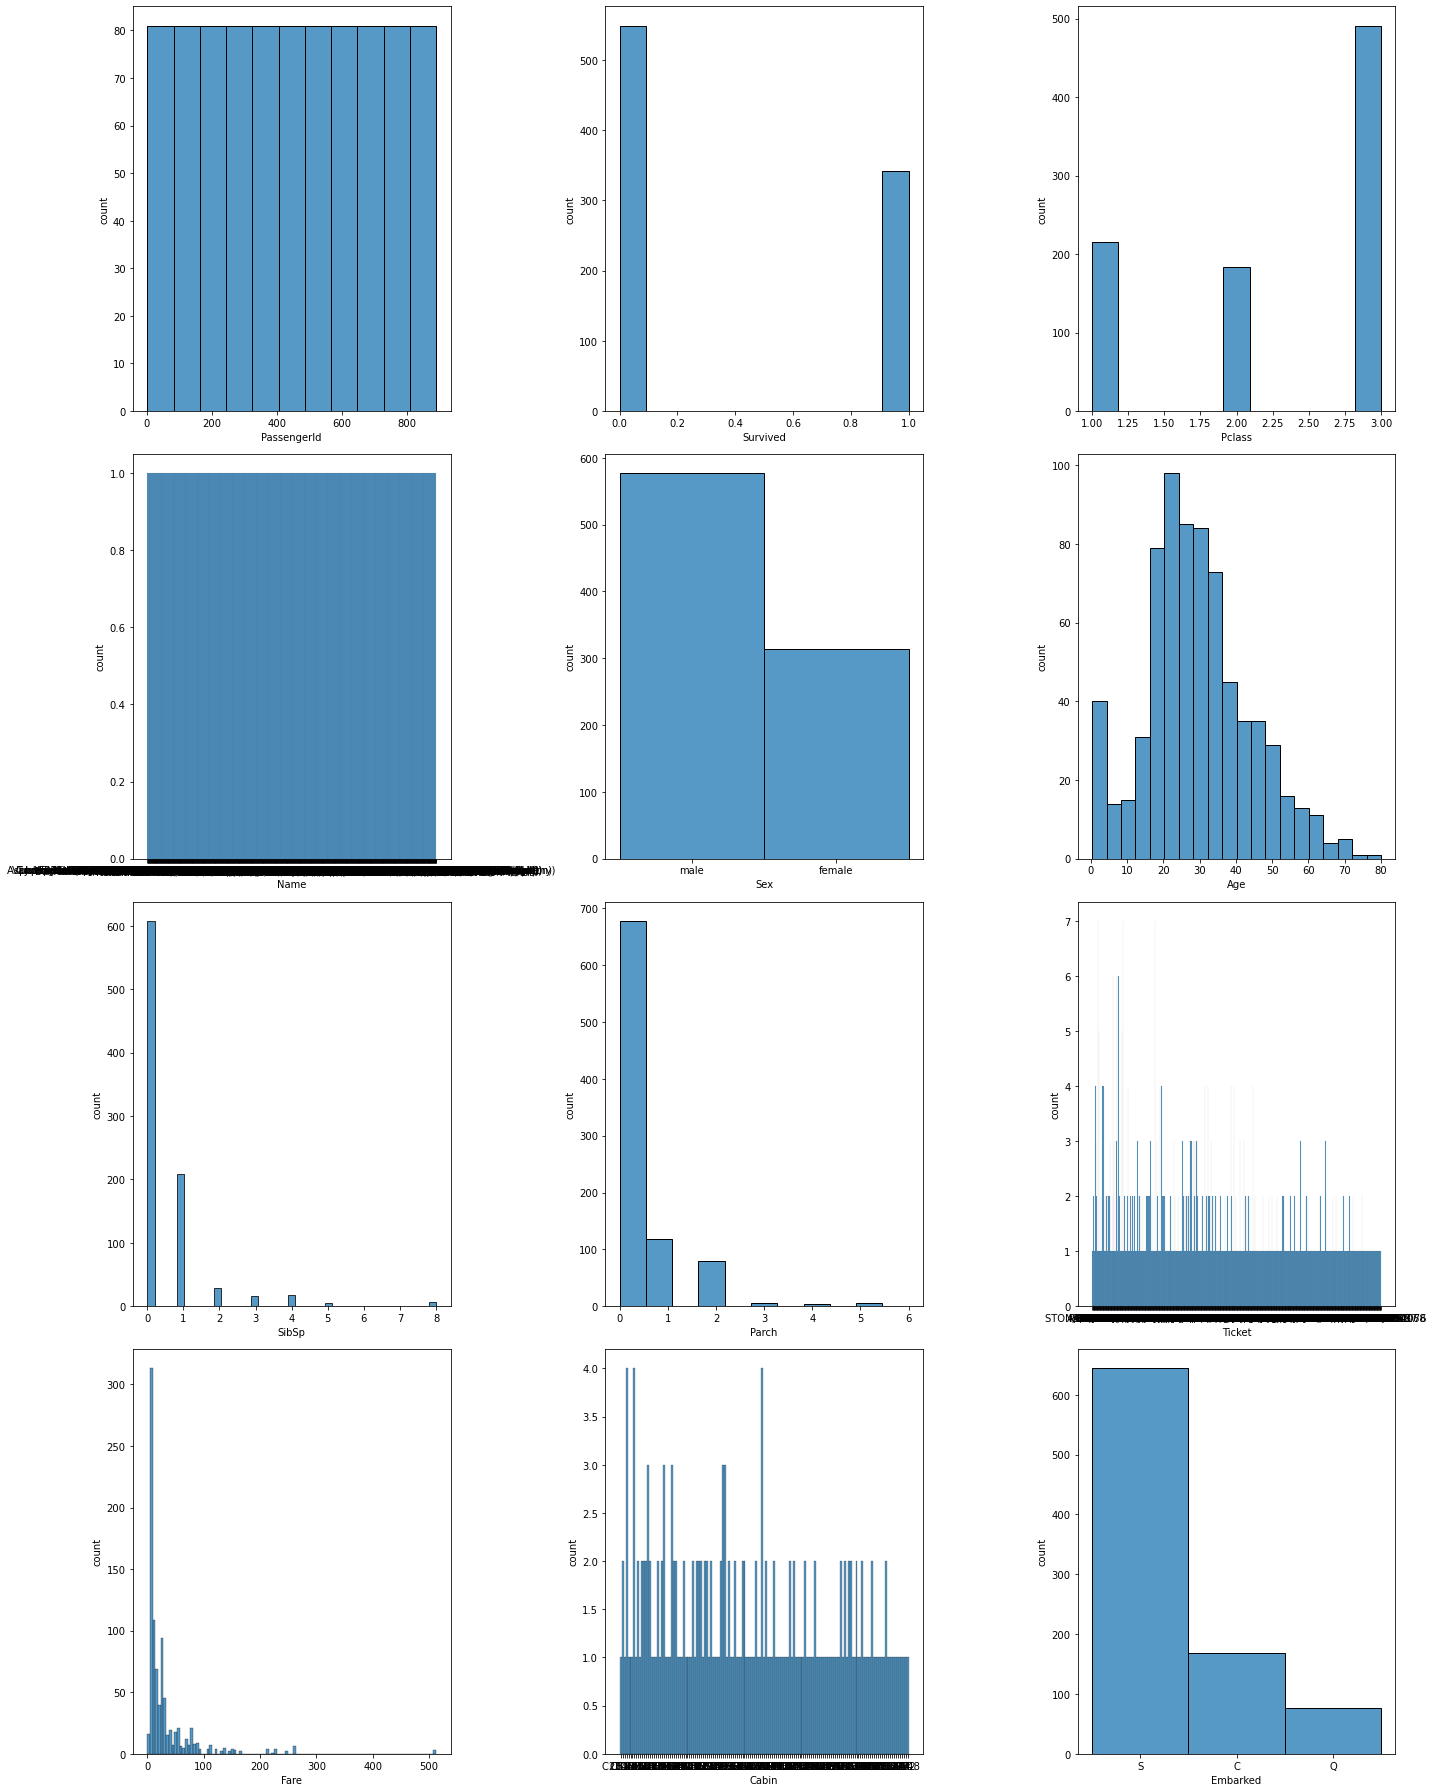

In [22]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()    

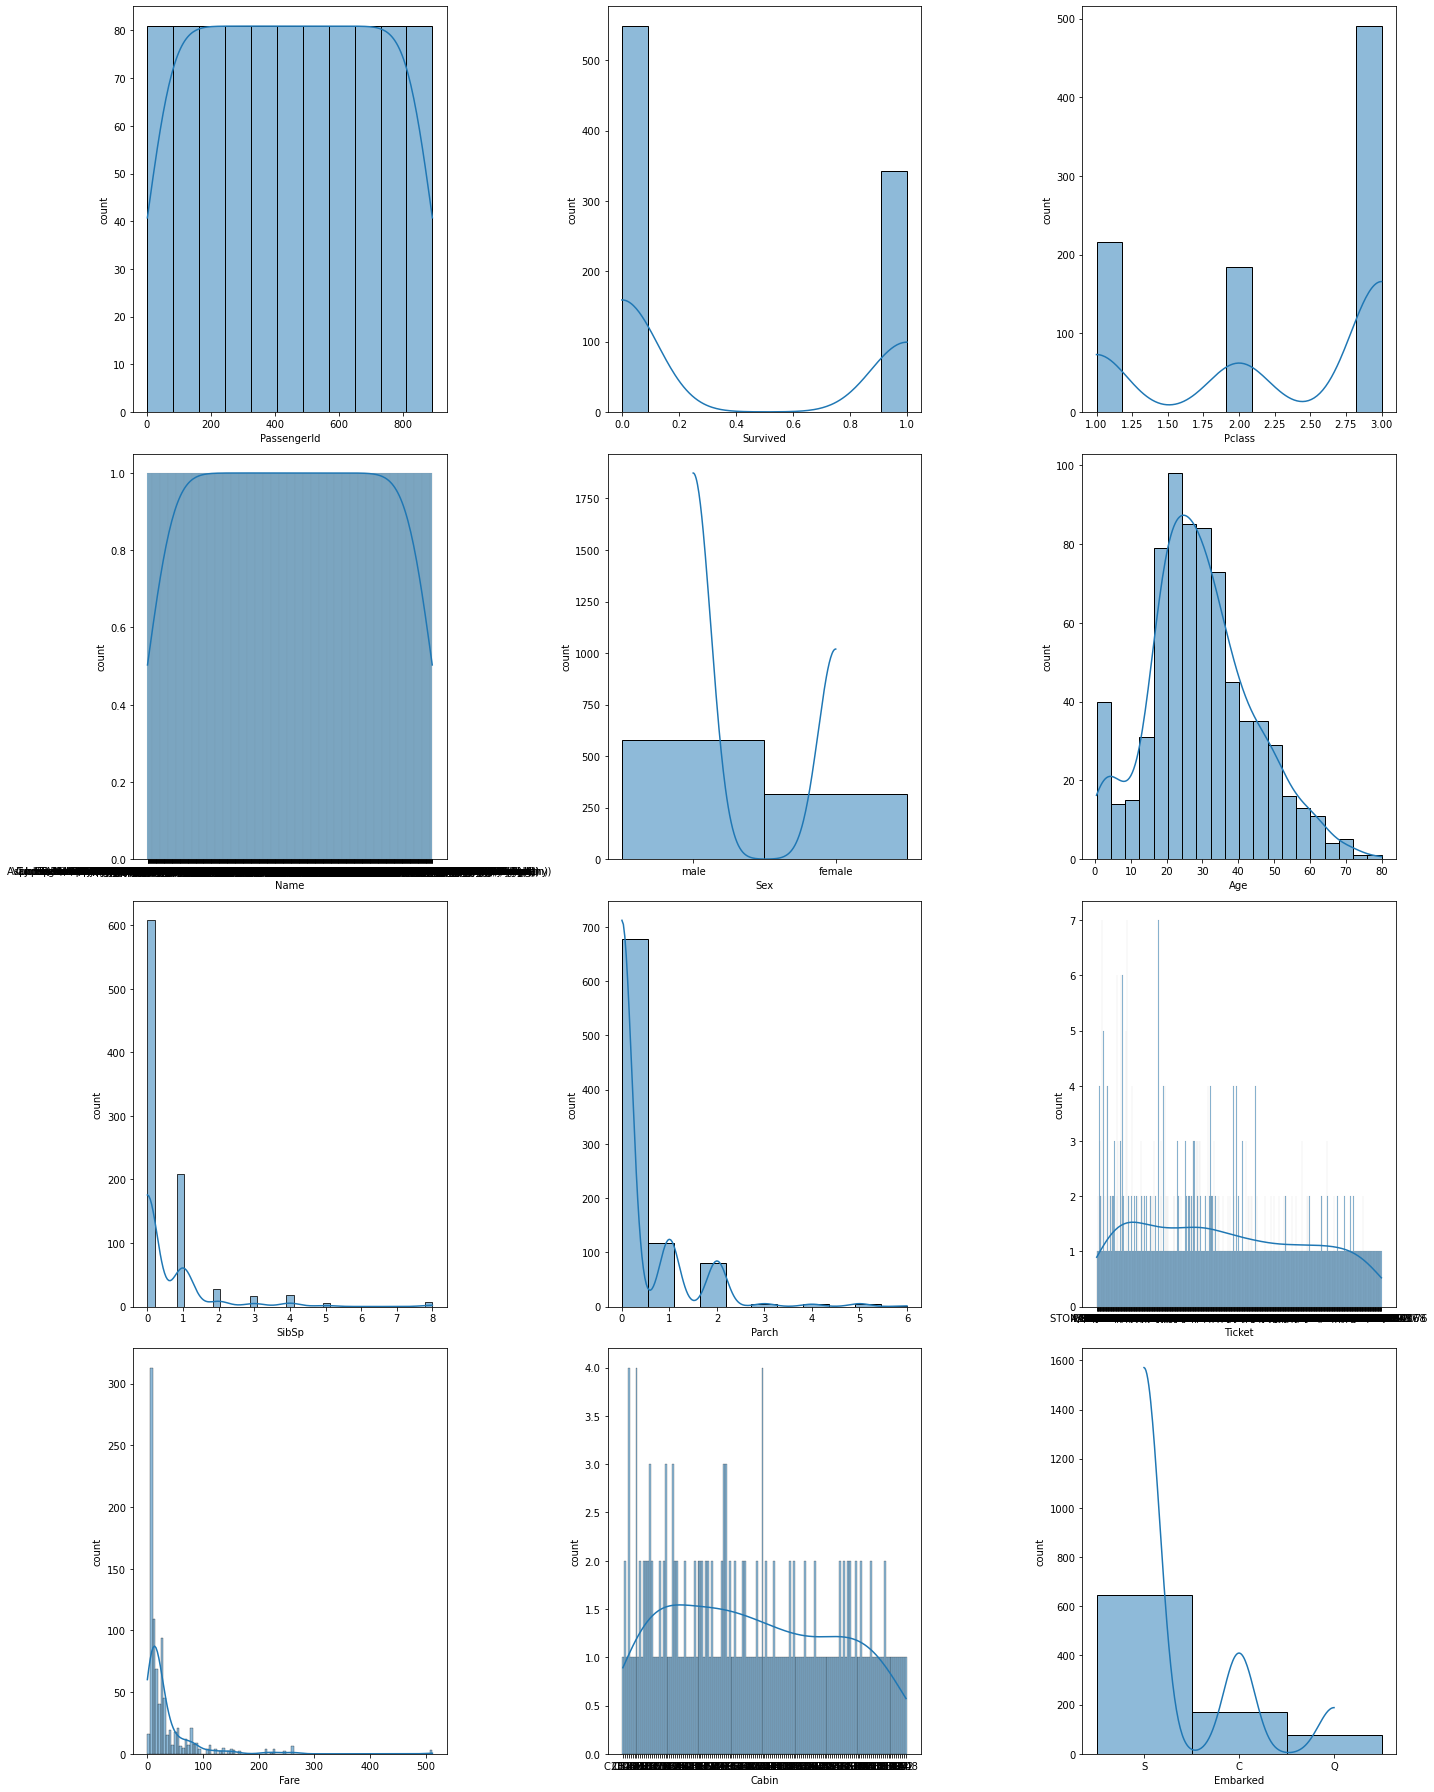

In [23]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()    

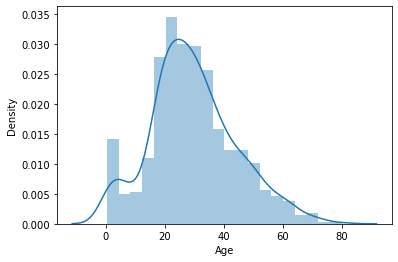

In [24]:
# numerical attributes
sns.distplot(data["Age"])
plt.show()

In [25]:
# insights
# Age are representing normal distribution

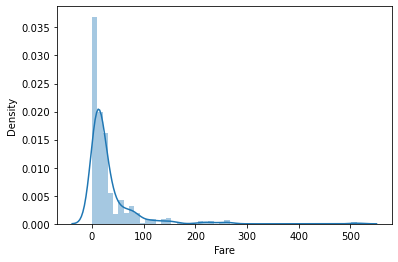

In [26]:
sns.distplot(data["Fare"])
plt.show()

In [27]:
# insights
# Fare are representing normal distribution

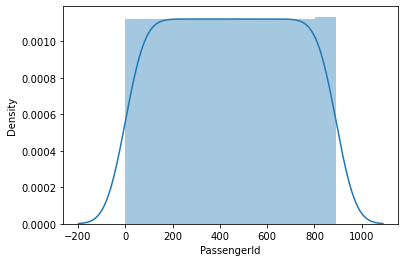

In [28]:
sns.distplot(data["PassengerId"])
plt.show()

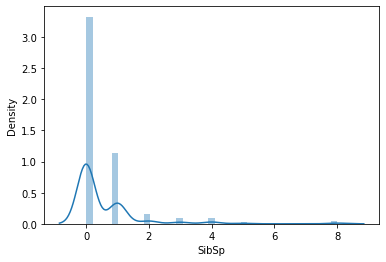

In [29]:
sns.distplot(data["SibSp"])
plt.show()

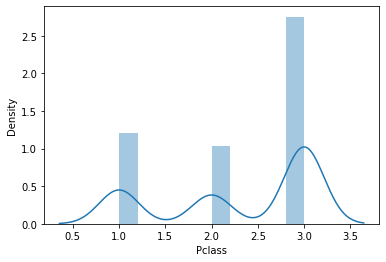

In [30]:
sns.distplot(data["Pclass"])
plt.show()

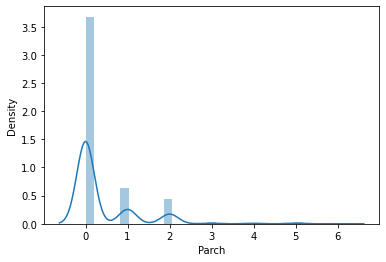

In [31]:
sns.distplot(data["Parch"])
plt.show()

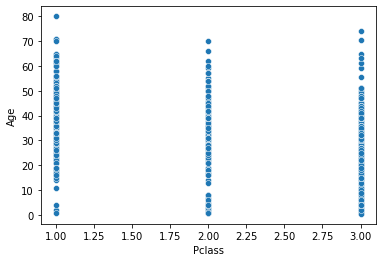

In [32]:
sns.scatterplot(data=data,x="Pclass",y="Age")
plt.show()

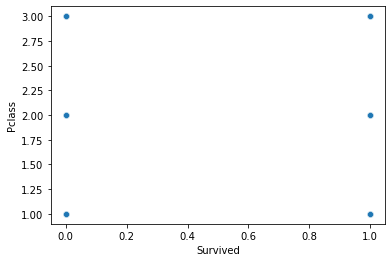

In [33]:
sns.scatterplot(data=data,x="Survived",y="Pclass")
plt.show()

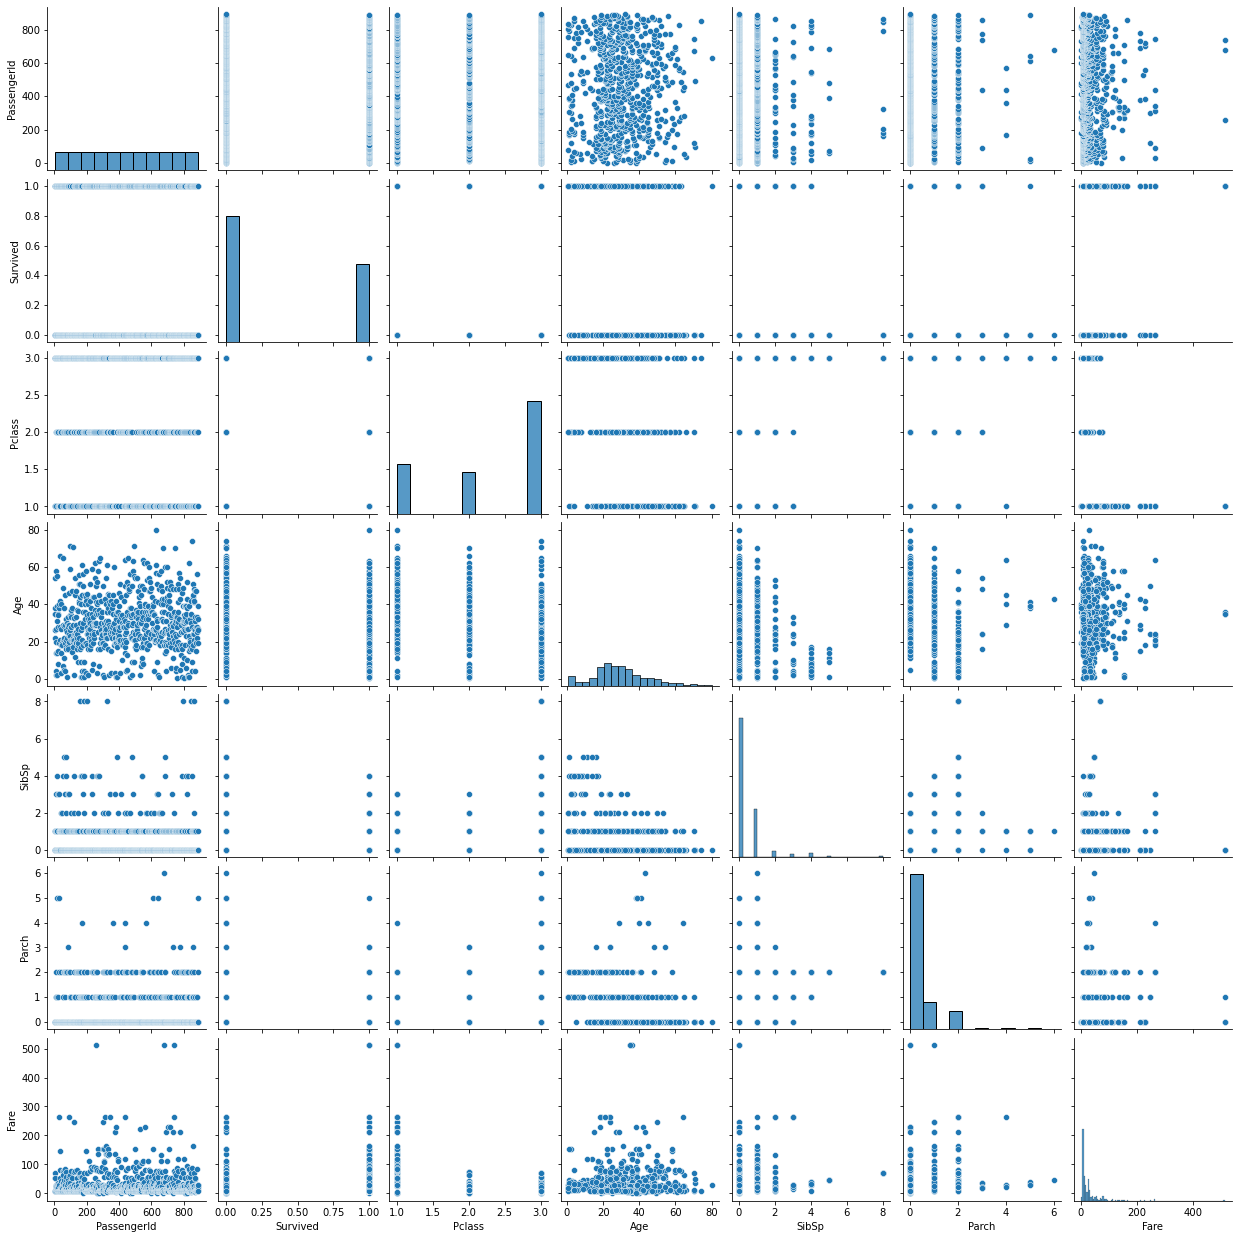

In [34]:
sns.pairplot(data=data,)

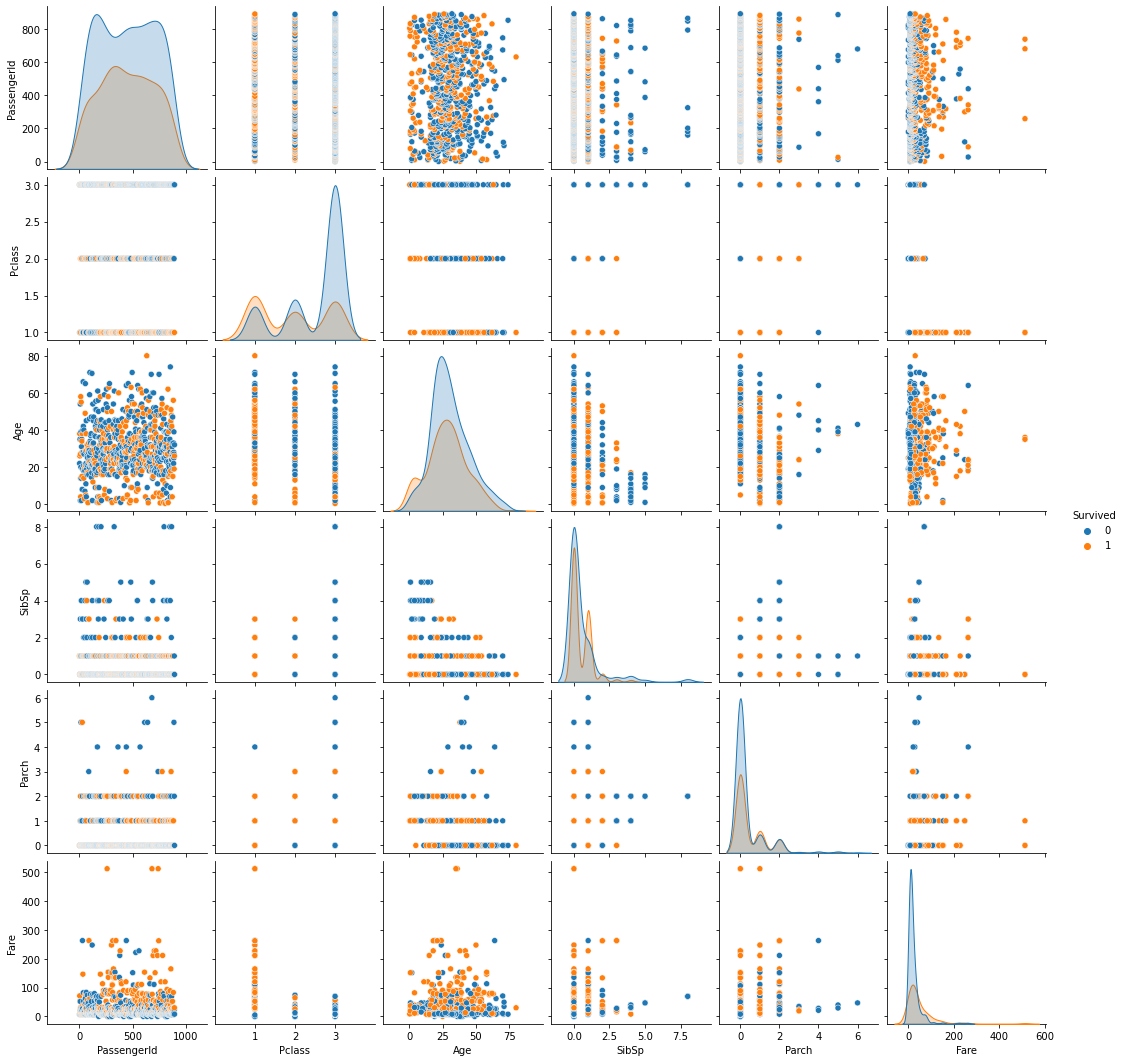

In [35]:
sns.pairplot(data,hue="Survived")
plt.show()

# Data Prepocessing

In [36]:
# Checking missing  values
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
# check for Duplicates
data.duplicated().sum()

0

# Check for Outliers

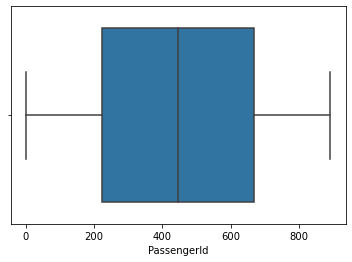

In [39]:
sns.boxplot(x=data.PassengerId)
plt.show()

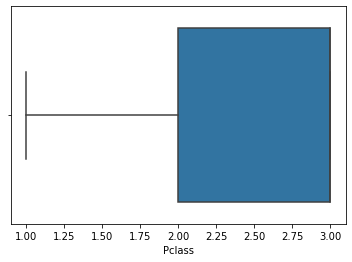

In [40]:
sns.boxplot(x=data.Pclass)
plt.show()

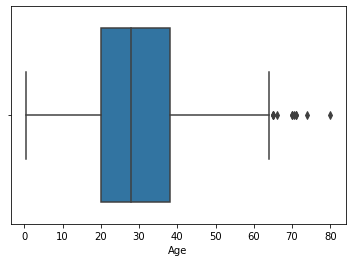

In [41]:
sns.boxplot(x=data.Age)
plt.show()

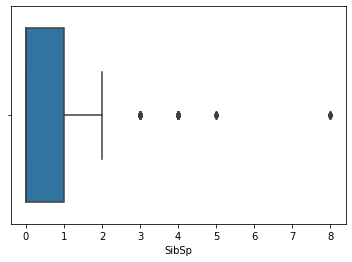

In [42]:
sns.boxplot(x=data.SibSp)
plt.show()

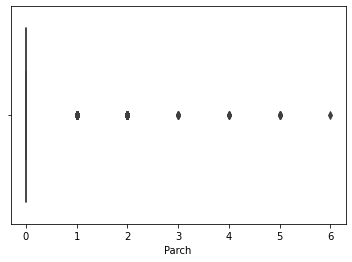

In [43]:
sns.boxplot(x=data.Parch)
plt.show()

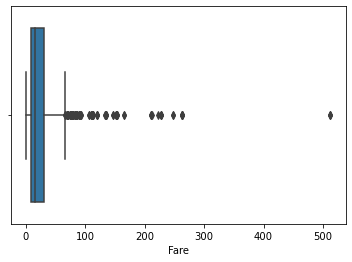

In [44]:
sns.boxplot(x=data.Fare)
plt.show()

#  Finding The Outliers

In [45]:
#find Q1 & Q3
Q1=data["Age"].quantile(0.25)
print('lower quartile',Q1)
Q3=data["Age"].quantile(0.75)
print('upper quartile',Q3)


lower quartile 20.125
upper quartile 38.0


In [46]:
#finding interquartile range
IQR=Q3-Q1
IQR


17.875

In [47]:
#find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)


lower_limit -6.6875
upper_limit: 64.8125


In [48]:
#find values above upper_limit
data.loc[data["Age"]>upper_limit]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [49]:
#find values above lower_limit
data.loc[data["Age"]<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [50]:
# Find percentage of outliers
len(data.loc[data["Age"]>upper_limit])/len(data)

0.012345679012345678

In [51]:
data.loc[data["Age"]>upper_limit,"Age"]=data["Age"].median()

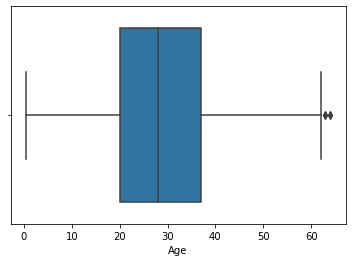

In [52]:
sns.boxplot(x=data.Age)
plt.show()

In [53]:
 #find Q1 & Q3
Q1=data["SibSp"].quantile(0.25)
print('lower quartile',Q1)
Q3=data["SibSp"].quantile(0.75)
print('upper quartile',Q3)
#finding interquartile range
IQR=Q3-Q1
print(IQR)
#find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)


lower quartile 0.0
upper quartile 1.0
1.0
lower_limit -1.5
upper_limit: 2.5


In [54]:
#find values above upper_limit 
data.loc[data["SibSp"]>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S


In [55]:
#find values above lower_limit
data.loc[data["SibSp"]<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [56]:
# Find percentage of outliers
len(data.loc[data["SibSp"]>upper_limit])/len(data)

0.051627384960718295

In [57]:
# how to handle outliers
#since data is not normal will replace outliers with median
data.loc[data["SibSp"]>upper_limit,"SibSp"]=data["SibSp"].median()        

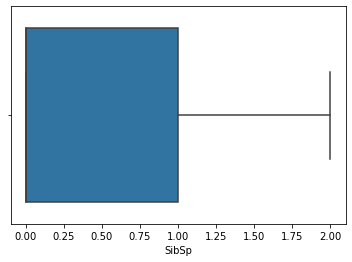

In [58]:
sns.boxplot(x=data.SibSp)
plt.show()

In [59]:
Q1=data["Parch"].quantile(0.25)
print('lower quartile',Q1)
Q3=data["Parch"].quantile(0.75)
print('upper quartile',Q3)
#finding interquartile range
IQR=Q3-Q1
IQR
#find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)


lower quartile 0.0
upper quartile 0.0
lower_limit 0.0
upper_limit: 0.0


In [60]:
#find values above upper_limit 
data.loc[data["Parch"]>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,0,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,0,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [61]:
#find values above lower_limit
data.loc[data["Parch"]<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [62]:
# Find percentage of outliers
len(data.loc[data["Parch"]>upper_limit])/len(data)

0.23905723905723905

In [63]:
# how to handle outliers
#since data is not normal will replace outliers with median
data.loc[data["Parch"]>upper_limit,"Parch"]=data["Parch"].median()        

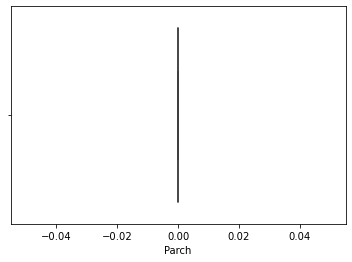

In [64]:
sns.boxplot(x=data.Parch)
plt.show()

In [65]:
Q1=data["Fare"].quantile(0.25)
print('lower quartile',Q1)
Q3=data["Fare"].quantile(0.75)
print('upper quartile',Q3)
#finding interquartile range
IQR=Q3-Q1
print(IQR)
#find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower_limit',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit:',upper_limit)


lower quartile 7.9104
upper quartile 31.0
23.0896
lower_limit -26.724
upper_limit: 65.6344


In [66]:
#find values above upper_limit 
data.loc[data["Fare"]>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,0,0,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,0,0,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,0,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,0,0,CA. 2343,69.5500,NaN,S


In [67]:
#find values above lower_limit
data.loc[data["Fare"]<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [68]:
# Find percentage of outliers
len(data.loc[data["Fare"]>upper_limit])/len(data)

0.13019079685746351

In [69]:
# how to handle outliers
#since data is not normal will replace outliers with median
data.loc[data["Fare"]>upper_limit,"Fare"]=data["Fare"].median()        

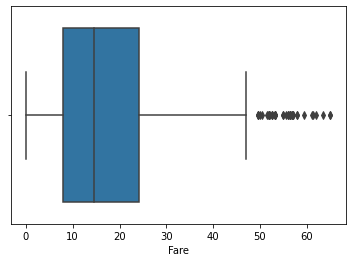

In [70]:
sns.boxplot(x=data.Fare)
plt.show()

<AxesSubplot:>

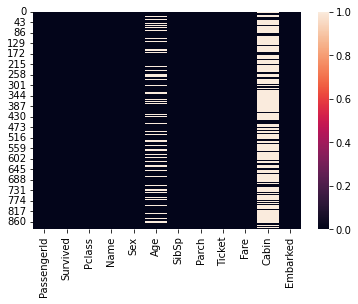

In [71]:
#Visualize null values
sns.heatmap(data=data.isnull())

In [72]:
# find the % of null values in age column
(data["Age"].isnull().sum()/len(data["Age"]))*100

19.865319865319865

In [73]:
# find the % of null values in cabin column
(data["Cabin"].isnull().sum()/len(data["Cabin"]))*100

77.10437710437711

In [74]:
data["Age"].median()

28.0

In [75]:
# replace null values

In [76]:
data.loc[data["Age"].isnull()==True,"Age"]=28 

In [77]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
data.loc[data["Cabin"].isnull()==True,"Cabin"]=data["Cabin"]="G6"

In [79]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

# check for Duplicates

In [80]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [81]:
data.duplicated().sum()

0

# Correlation Matrix

In [82]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.040917,-0.026707,NaN,0.002589
Survived,-0.005007,1.000000,-0.338481,-0.045730,0.160608,NaN,0.190926
Pclass,-0.035144,-0.338481,1.000000,-0.332946,-0.128272,NaN,-0.433904
Age,0.040917,-0.045730,-0.332946,1.000000,-0.026965,NaN,0.050907
SibSp,-0.026707,0.160608,-0.128272,-0.026965,1.000000,NaN,0.241798
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.002589,0.190926,-0.433904,0.050907,0.241798,NaN,1.000000


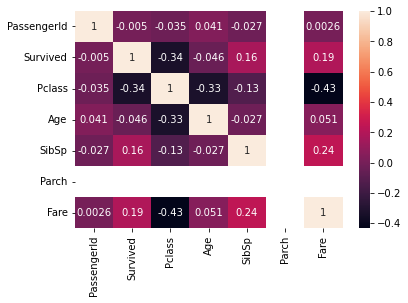

In [83]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [84]:
# label Encoding
from sklearn.preprocessing  import LabelEncoder
cols=["Sex","Embarked"]
le=LabelEncoder()

for col in cols:
    data[col]=le.fit_transform(data[col])

In [85]:
data.drop("Name",axis=1,inplace=True)

In [86]:
data.drop("Ticket",axis=1,inplace=True)


In [87]:
data.drop("Cabin",axis=1,inplace=True)

In [88]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,14.4542,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Split data for traning and testing



In [89]:
x=data.drop(columns=["Survived"],axis=1)
y=data["Survived"]

In [90]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,14.4542,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [91]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [93]:
x_train.shape

(623, 8)

In [94]:
y_train.shape

(623,)

In [95]:
x_test.shape

(268, 8)

In [96]:
y_test.shape

(268,)

# Model Training

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model=LogisticRegression()

In [99]:
model.fit(x_train,y_train)

LogisticRegression()

In [100]:
# Make predication/test model
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [101]:
y_test

646    0
876    0
359    1
194    1
819    0
      ..
455    1
432    1
473    1
658    0
757    0
Name: Survived, Length: 268, dtype: int64

In [102]:
df=y_test.copy()

In [103]:
df["y_pred"]=y_pred

In [104]:
df

646                                                       0
876                                                       0
359                                                       1
194                                                       1
819                                                       0
                                ...                        
432                                                       1
473                                                       1
658                                                       0
757                                                       0
y_pred    [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, ...
Name: Survived, Length: 269, dtype: object

In [105]:
y_test.size

268

In [106]:
x_test.size

2144

# Testing
 See how our model is performing

In [107]:
# print confusion matrix

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [111]:
confusion_matrix(y_test,y_pred)

array([[156,  22],
       [ 26,  64]], dtype=int64)

In [116]:
accuracy_score(y_test,y_pred)

0.8208955223880597

In [126]:
precision_score(y_test,y_pred)

0.7441860465116279

In [118]:
recall_score(y_test,y_pred)

0.7111111111111111

In [119]:
f1_score(y_test,y_pred)

0.7272727272727273

In [120]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Predicted No","Predicted Yes"],index=["Actual No","Actual Yes"])

,Predicted No,Predicted Yes
Actual No,156,22
Actual Yes,26,64


In [121]:
# import Classification Report

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       178
           1       0.74      0.71      0.73        90

    accuracy                           0.82       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



In [124]:
# ROC-AUC method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.7937578027465669
